In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import pickle

In [2]:
DATA_FOLDER = '/home/akasha/projects/ontological_audio_embeddings/data/preprocessed/'
df = pd.read_csv(DATA_FOLDER+'dataset.csv', header=None)
df.columns = ['Path', 'label']

In [30]:
df.head()

,Path,label
0,/home/akasha/projects/ontological_audio_embedd...,/m/09x0r
1,/home/akasha/projects/ontological_audio_embedd...,/m/012xff
2,/home/akasha/projects/ontological_audio_embedd...,/m/03fwl
3,/home/akasha/projects/ontological_audio_embedd...,/t/dd00003
4,/home/akasha/projects/ontological_audio_embedd...,/m/032s66


In [31]:
with open(DATA_FOLDER+'label_dict.pkl', 'rb') as f:
    label_dict, num = pickle.load(f)

In [4]:
counts = df['label'].value_counts()

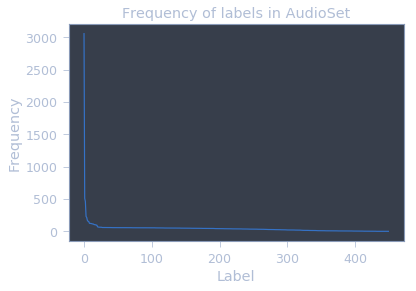

In [5]:
x = counts.values
plt.plot(x)
plt.title('Frequency of labels in AudioSet')
plt.ylabel('Frequency')
plt.xlabel('Label')
plt.show()

## Filter classes that do not have more than 50 samples

In [6]:
counts = counts[counts >= 50]

filtered_df = df[df['label'].isin(counts.index.values)]

In [82]:
print("Number of samples: ", len(filtered_df))

Number of samples:  13678


In [86]:
# Set numeric labels
labels = filtered_df['label'].values
numeric_label = [label_dict[label] for label in labels]

filtered_df['numeric_label'] = numeric_label
filtered_df.head()

/home/akasha/.build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Path,label,numeric_label
0,/home/akasha/projects/ontological_audio_embedd...,/m/09x0r,104
1,/home/akasha/projects/ontological_audio_embedd...,/m/012xff,31
2,/home/akasha/projects/ontological_audio_embedd...,/m/03fwl,374
4,/home/akasha/projects/ontological_audio_embedd...,/m/032s66,354
5,/home/akasha/projects/ontological_audio_embedd...,/m/01y3hg,350


In [87]:
# write to csv without headers
filtered_df.to_csv('filtered_dataset.csv', header=False)

In [96]:
import librosa

# calculate mean length
lens = []
for i, row in filtered_df.iterrows():
    x = np.load(row['Path'])
    lens.append(x.shape[0])
lens = np.array(lens)
median = np.median(lens)
print("median ", median)

median  160086.0


In [106]:

for i, row in filtered_df.iterrows():
    x = np.load(row['Path'])
    print(x.shape)
    if x.shape[0] < median:
        padw = int(median) -  x.shape[0]
        x = np.pad(x, (0, padw), mode='constant')
        break
    else:
        continue
        #x = x[:int(median)]
    
print(x.shape)

(160125,)
(159754,)
(160086,)


In [107]:
x

array([ 3.4700288e-06, -1.0006487e-04, -1.4192825e-04, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [109]:
paths = []
for path in filtered_df['Path'].values:
    split_path = path.split('/')
    split_path[-2] = split_path[-2]+'v2'
    path = '/'.join(split_path)
    paths.append(path)
    
filtered_df['Path'] = paths
print(filtered_df['Path'].values)

['/home/akasha/projects/ontological_audio_embeddings/data/preprocessed/rawAudioSetv2/audio_--PJHxphWEs.npy'
 '/home/akasha/projects/ontological_audio_embeddings/data/preprocessed/rawAudioSetv2/audio_--ZhevVpy1s.npy'
 '/home/akasha/projects/ontological_audio_embeddings/data/preprocessed/rawAudioSetv2/audio_--aE2O5G5WE.npy'
 ...
 '/home/akasha/projects/ontological_audio_embeddings/data/preprocessed/rawAudioSetv2/audio_zz8TGV83nkE.npy'
 '/home/akasha/projects/ontological_audio_embeddings/data/preprocessed/rawAudioSetv2/audio_zzlK8KDqlr0.npy'
 '/home/akasha/projects/ontological_audio_embeddings/data/preprocessed/rawAudioSetv2/audio_zzya4dDVRLk.npy']


/home/akasha/.build/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
filtered_df.to_csv('filtered_dataset.csv', header=False)

In [8]:
p = filtered_df.iloc[[0]]['Path'].values[0]

In [11]:
x = np.expand_dims(np.load(p), axis=0)
var = np.var(x, axis=1)[0]
print(x.shape)
print(var)

(1, 160125)
0.021196


In [12]:
x = np.random.normal(0.0, 0.5, (1, 100))

In [13]:
x.shape

(1, 100)

In [15]:
t = 0.4
t = 0.5 if t >=0.5 else t
print(t)

0.4
